In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# 模块cv2的用法

In [2]:
"图像读取使用函数cv2.imread(filepath,flags)"
img_ori = cv2.imread('lenna.jpg', 1)  # 文件路径，图片的标志（1彩色，0灰色）
print(img_ori.shape)  # 显示图像尺寸


(500, 500, 3)


In [51]:
"显示图像函数cv2.imshow(wname,img)，这不是交互式的显示,可采用matplotlib.pyplot模块进行交互式显示"
#缩放通过cv2.resize()实现，裁剪则是利用array自身的下标截取实现"
img_resize = cv2.resize(img_ori, (300, 300))
cv2.imshow('lenna_photo', img_resize)  # 窗口名字，读入的图像
print(img_resize.shape)
# 等待键盘输入，单位为毫秒，在等待时间内按下任意键则返回按键的ASCII码，参数为0表示无限等待。
# 不调用waitKey的话，窗口会一闪而逝，看不到显示的图片
key = cv2.waitKey(0)
if key == 27:  # 数值为对应的Ascii码，27表示Esc的Ascii码,也可用ord('a')
    cv2.destroyAllWindows()  # 销毁指定的窗口

(300, 300, 3)


In [15]:
"保存图像函数cv2.imwrite(file,img,num)，要保存的文件名，要保存的图像，保存的位置和此文件一致"
"它针对特定的格式：对于JPEG，其表示的是图像的质量，用0 - 100的整数表示，默认95;对于png ,第三个参数表示的是压缩级别。默认为3."
# cv2.IMWRITE_JPEG_QUALITY类型为 long ,必须转换成 int
cv2.imwrite('1.jpeg', img_ori, [int(cv2.IMWRITE_JPEG_QUALITY), 95])
# cv2.IMWRITE_PNG_COMPRESSION, 从0到9 压缩级别越高图像越小。
cv2.imwrite('1.png', img_ori, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])

True

##图片操作

In [40]:
"使用函数cv2.flip(img,flipcode)翻转图像，flipcode控制翻转效果"
# flipcode = 0：沿x轴翻转;flipcode > 0：沿y轴翻转;flipcode < 0：x,y轴同时翻转
imgflip = cv2.flip(img_ori, 1)
imgcopy = img_ori.copy()  # 使用copy()方法可复制图像

"颜色空间转换"
# 彩色图像转为灰度图像
img2 = cv2.cvtColor(img_ori, cv2.COLOR_RGB2GRAY)
# 灰度图像转为彩色图像
# img3 = cv2.cvtColor(img_ori, cv2.COLOR_GRAY2BGR)


In [13]:
#模块matlpotlib.pyplot的用法

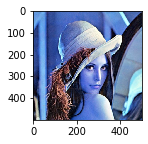

In [32]:
# plt显示图片，要注意是否为灰度图，以及颜色通道的顺序
plt.figure(figsize=(2,2))  # 调节图像尺寸
plt.imshow(img_ori,cmap='gray')  # cv2.imshow(wname,img),cmap默认是彩色，使用gray时，要保证导入的图像也是灰色
plt.show()  # 显示图像

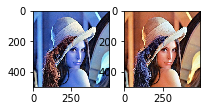

In [37]:
# subplot子图的使用
plt.figure(figsize=(3,3))
plt.subplot(121)  #1行2列，这是第1个
plt.imshow(img_ori) 
plt.subplot(122)  #1行2列，这是第2个
plt.imshow(cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB))  #换了颜色通道后正确显示原图
plt.show()

In [38]:
# 图像剪切

In [3]:
def my_show(img, size=(3,3)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

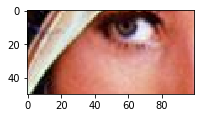

In [129]:
my_show(img_ori[150:300,100:300][100:400,100:200])  # 裁剪坐标为[y0:y1,x0:x1 ][y':y"，x':x"](对在原图裁剪后的图片,再次截取相应的长度）
#y'要小于图像的长度,y'-y"的长度不能为零（可以不写），y"可以溢出，但会以原始截取的长度为准

# 图像通道的拆分 cv2.split

In [ ]:
# 通道分离，注意顺序BGR不是RGB
(B, G, R) = cv2.split(img_ori)
# 显示各个分离出的通道，因为是单通道，所以图片都是灰色的
cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [4]:
#显示成红、绿、蓝三色图像
(B, G, R) = cv2.split(img_ori)
# 生成一个值为0的单通道数组
zeros = np.zeros(img_ori.shape[:2], dtype = "uint8")

# 分别扩展B、G、R成为三通道。另外两个通道用上面的值为0的数组填充
cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))
cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
cv2.waitKey(0)

-1

In [9]:
# 对不同通道进行函数关系映射，实现对图像的色彩进行调节
def img_wormer(img, b_decrease, r_increase):  # 暖色系
    (B, G, R) = cv2.split(img)
    r_lim = 255 - r_increase # 下限
    R[R>r_lim] = 255  #使B通道里面超过下限的每个值都为255
    R[R<=r_lim] = (r_increase + R[R<=r_lim]).astype(img.dtype)  # astype：转换数组的数据类型。这里就是保持其类型不改变
    
    b_lim = b_decrease
    B[B<b_decrease] =  0
    B[B>=b_lim] = (B[B>=b_lim] - b_decrease).astype(img.dtype)
    return cv2.merge((B, G, R))  #cv2.merge函数是合并单通道成多通道（不能合并多个多通道图像）

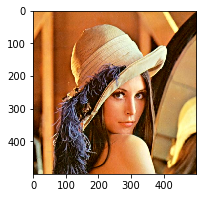

In [13]:
wormer_image = img_wormer(img_ori,30,10)
my_show(wormer_image)

# 伽玛变换 Gamma

In [ ]:
"""无论是HSV还是RGB，我们都较难一眼就对像素中值的分布有细致的了解，这时候就需要直方图。
如果直方图中的成分过于靠近0或者255，可能就出现了暗部细节不足或者亮部细节丢失的情况。
这个时候，一个常用方法是考虑用Gamma变换来提升暗部细节。
Gamma变换是矫正相机直接成像和人眼感受图像差别的一种常用手段，
简单来说就是通过非线性变换让图像从对曝光强度的线性响应变得更接近人眼感受到的响应。
"""

In [22]:
# 定义Gamma矫正函数
def gamma_trans(img, gamma=1.0):
    # 具体做法是先归一化到1，然后gamma(0,10]作为指数值求出新的像素值再还原
    invGamma = 1.0/gamma  # 取gamma倒数是使gamma值越大图像越亮
    gamma_table = [np.power(x/255.0, invGamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype('uint8')
    # 实现这个映射用的是OpenCV的查表函数
    return cv2.LUT(img, gamma_table)
    

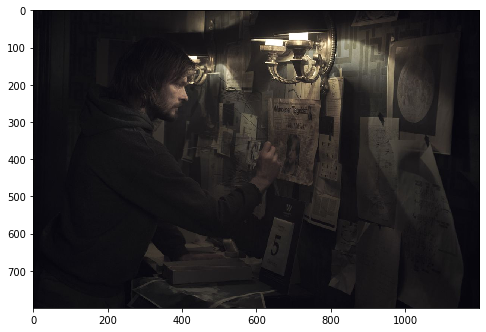

In [18]:
img_dark = cv2.imread('dark.jpg', 1)
my_show(img_dark, size=(8,8))

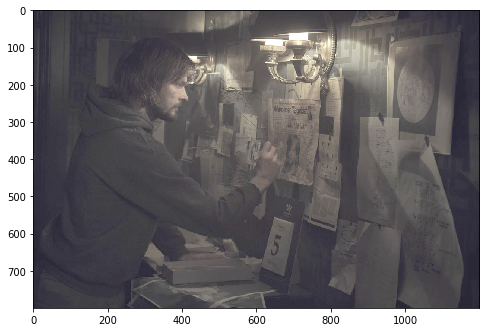

In [28]:
img_brighter = gamma_trans(img_dark, 2)
my_show(img_brighter, size=(8,8))

# 直方图均衡

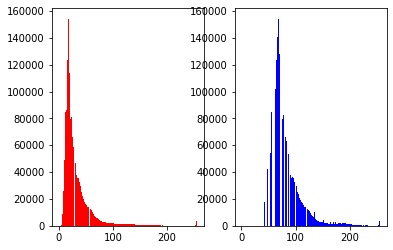

In [30]:
plt.subplot(121)
plt.hist(img_dark.flatten(), 265, [0, 256], color='r')
plt.subplot(122)
plt.hist(img_brighter.flatten(), 256, [0, 256], color='b')
plt.show()

# YUV色彩空间的Y进行直方图均衡来调亮图片

In [31]:
img_yuv = cv2.cvtColor(img_dark, cv2.COLOR_BGR2YUV) # BGR转YUV
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) # 0表示第一个通道及y通道对Y通道单独进行调整
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # YUV转BGR

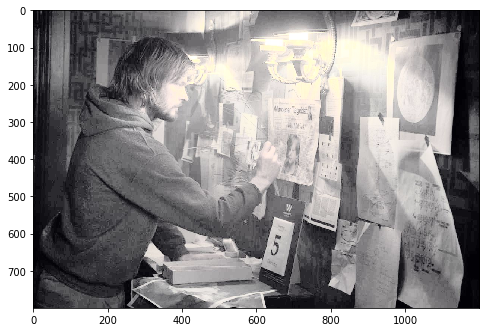

In [32]:
my_show(img_output, size=(8,8))

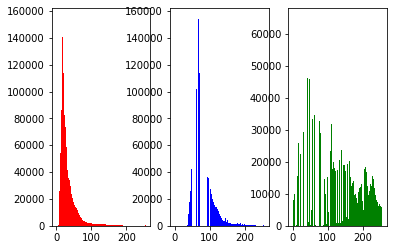

In [33]:
plt.subplot(131)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(132)
plt.hist(img_brighter.flatten(),256,[0,256],color='b')
plt.subplot(133)
plt.hist(img_output.flatten(),256,[0,256],color='g')
plt.show()

# 图像的仿射变换

In [ ]:
# 图像的仿射变换涉及到图像的形状位置角度的变化，是深度学习预处理中常用的功能，
# 仿射变换具体到图像中的应用，主要是对图像的缩放，旋转，剪切，翻转和平移的组合。
# 在OpenCV中实现仿射变换是通过仿射变换矩阵和cv2.warpAffine()这个函数

In [52]:
pts1 = np.float32([[0,0],[0,500],[500,0],[500,500]]) # 源点创建
pts2 = np.float32([[90,19],[40,460],[460,19],[410,420]]) # 目标点创建

M = cv2.getPerspectiveTransform(pts1,pts2) # 计算得到单应性矩阵
img_warp = cv2.warpPerspective(img_ori, M, (500,500)) # img_ori.shpae[0]表示图片长，通过得到的矩阵对图片进行变换

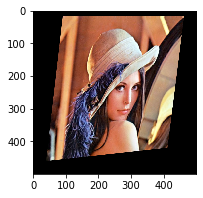

In [53]:
my_show(img_warp)

In [58]:
# rotation 旋转
img = img_ori
M =cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2), 30, 0.5)# center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated_lena', img_rotate)
key = cv2.waitKey(0)
print(M)

[[  0.5   0.  125. ]
 [ -0.    0.5 125. ]]


In [60]:
# Affine Transform 仿射变换
rows, cols, ch =img.shape
pts1 = np.float32([[0,0], [cols - 1,0],[0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows *  0.1], [cols * 0.9, rows * 0.2],  [cols * 0.1, rows * 0.9]])
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))
cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)

# 腐蚀和膨胀（黑白）

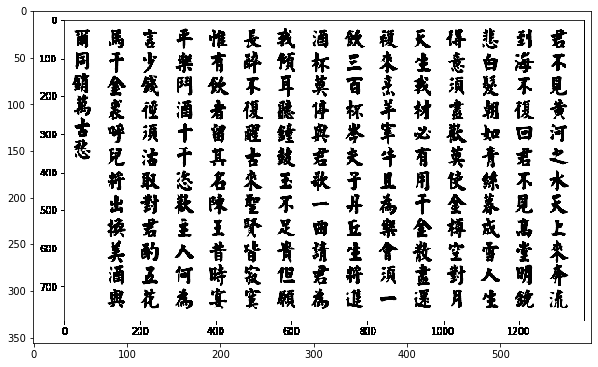

In [63]:
img_writing = cv2.imread('libai.png',0)
plt.figure(figsize=(10,8))
plt.imshow(img_writing,cmap='gray')
plt.show()

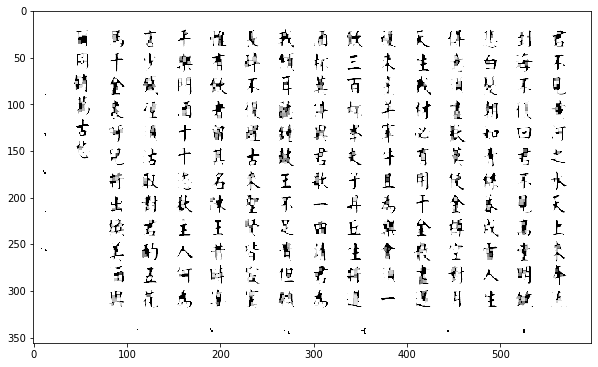

In [64]:
dilate_writing = cv2.dilate(img_writing,None,iterations=1)
plt.figure(figsize=(10,8))
plt.imshow(dilate_writing,cmap='gray')
plt.show()